# Which DS online course to take first?

---

[![Source Code](https://img.shields.io/badge/GitHub-100000?style=for-the-badge&logo=github&logoColor=white)](https://github.com/antonAce/data-science-courses)
[![Kaggle notebook](https://img.shields.io/badge/Kaggle-20BEFF?style=for-the-badge&logo=Kaggle&logoColor=white)](https://www.kaggle.com/antonkozyriev/which-ds-online-course-to-take-first)
[![Made with StreamLit](https://img.shields.io/badge/Streamlit-FF4B4B?style=for-the-badge&logo=Streamlit&logoColor=white)](https://antonace-streamlit-ds-courses-introduction-qkg9ju.streamlit.app/)


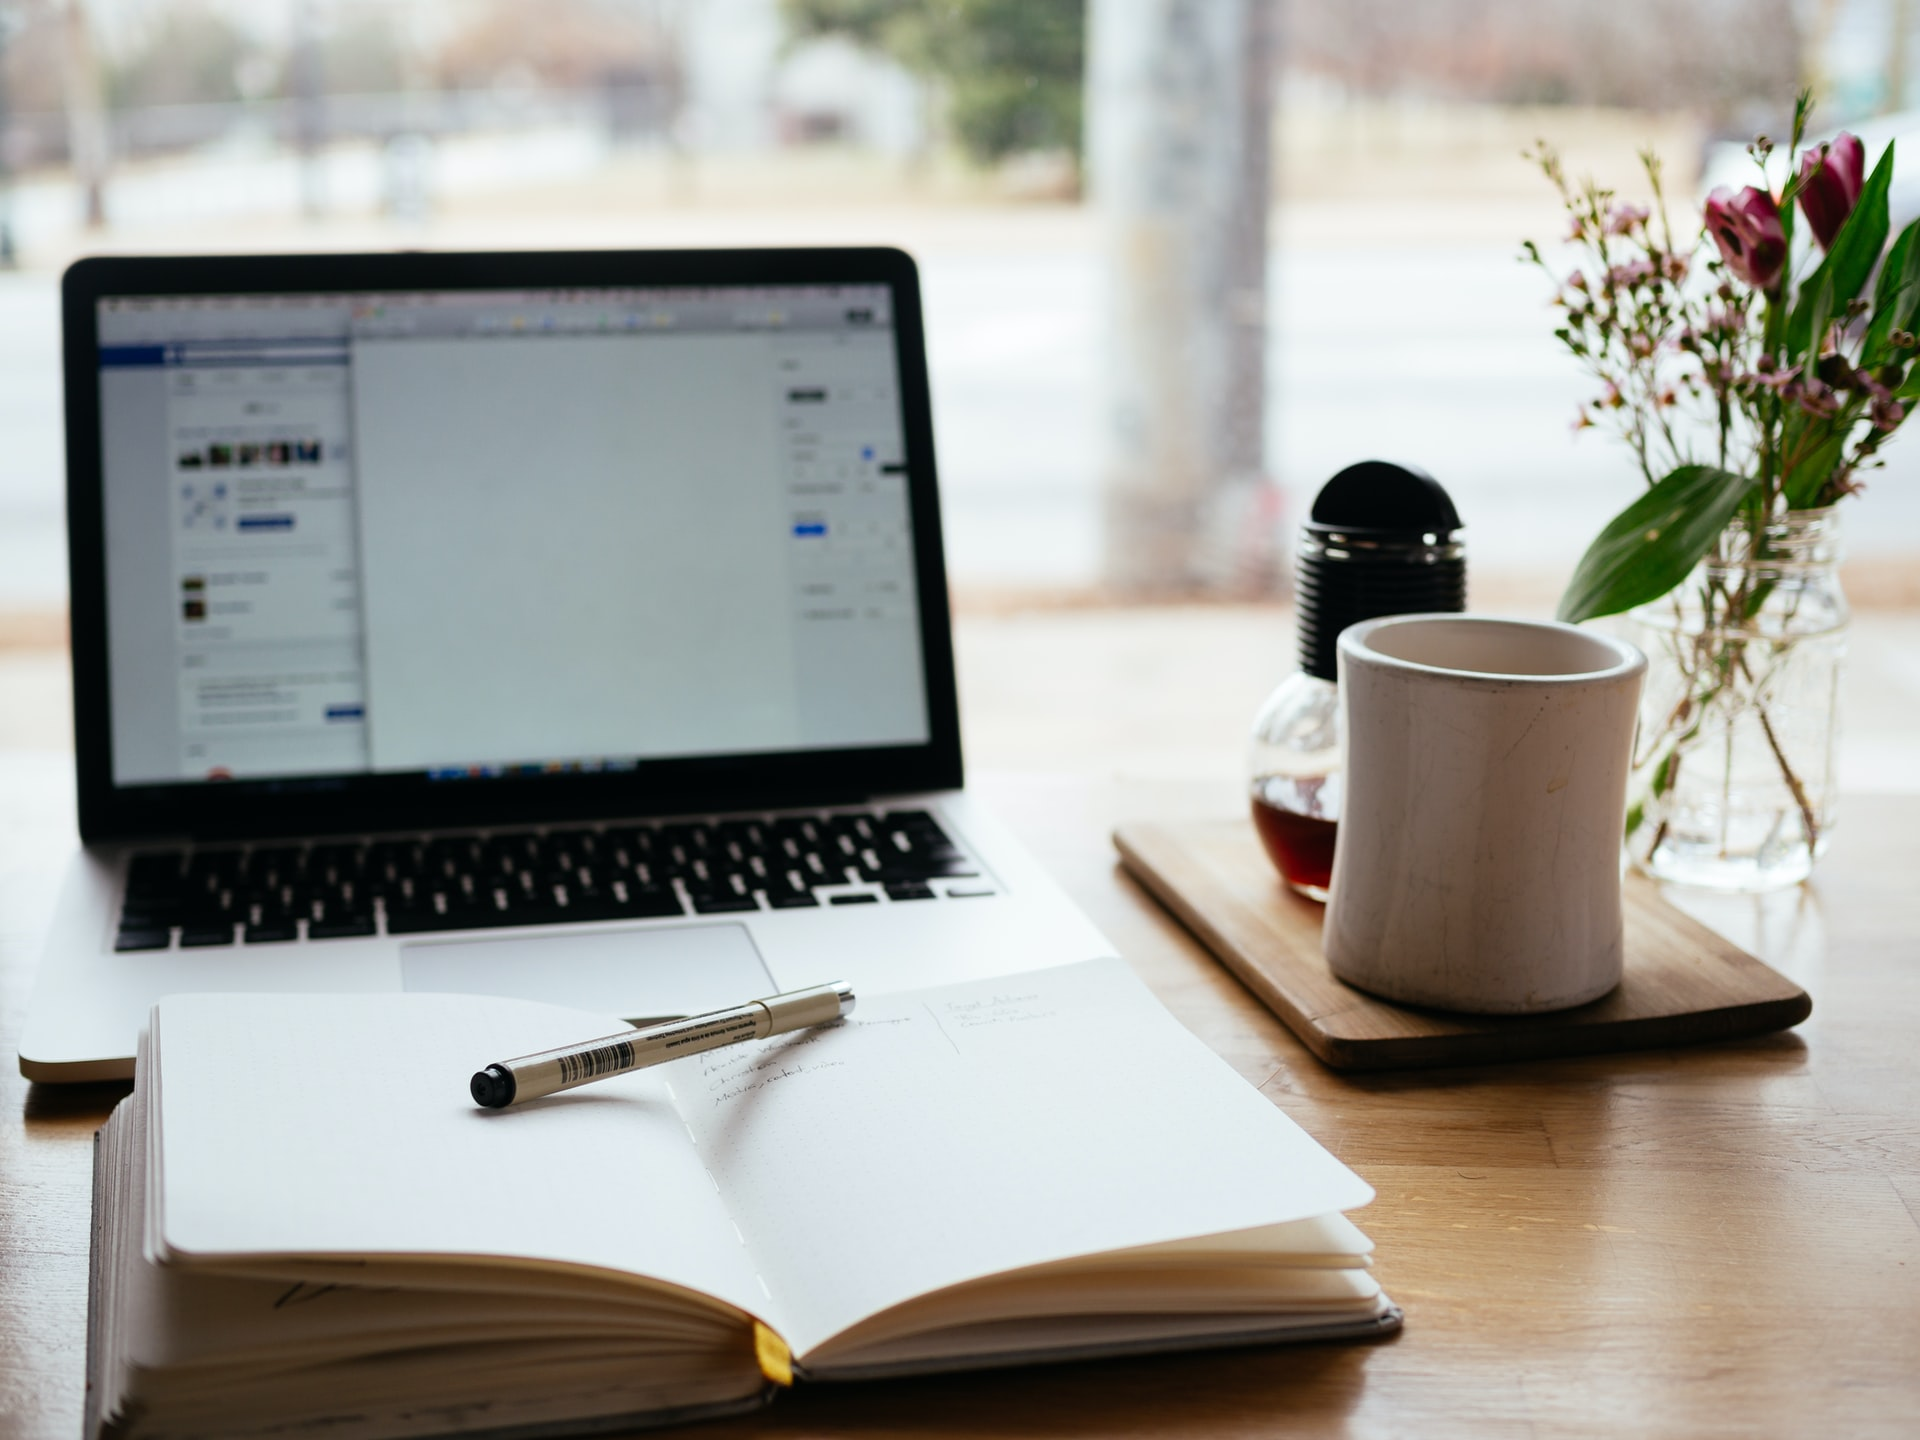

*[Image by Nick Morrison from unsplash.com](https://unsplash.com/photos/FHnnjk1Yj7Y)*


## Context

Nowadays, online educational platforms provide a vast amount of online courses. For self-learning beginners in Data Science, sometimes it's hard to choose an online lecture to start. This EDA intends to answer common questions when choosing a new study like **"Does a paid course provide higher quality than a free one?"** or **"Which platform is the most suitable for beginners?"**, and also to discover which online platform provides the highest educational quality.

## Acknowledgements

Data was collected via web scraping from popular online platforms: [Coursera](https://www.coursera.org), [Stepik](https://stepik.org), [Udemy](https://www.udemy.com), [edX](https://www.edx.org), [Pluralsight](https://www.pluralsight.com), [Alison](https://alison.com), [FutureLearn](https://www.futurelearn.com), and [Skillshare](https://www.skillshare.com). From each platform were queried courses only related to the "Data Science" topic.

## Data preview

Structure of the collected data.

In [1]:
import pandas as pd


dataframe = pd.read_csv("../input/online-data-science-courses/dataframe.csv", index_col=0)

dataframe

,title,author,rating,votes_count,students_count,level,duration,platform,free
0,Машинное обучение и анализ данных,Moscow Institute of Physics and Technology,4.7,6382.0,100000.0,Intermediate,224.000000,Coursera,False
1,Introducción a la Especialización en Ciencia d...,IBM,4.6,116.0,3400.0,Beginner,48.000000,Coursera,False
2,Getting Started with SAS Programming,SAS,4.8,2083.0,67000.0,Beginner,22.000000,Coursera,False
3,Introduction to Designing Data Lakes on AWS,Amazon Web Services,4.7,65.0,6100.0,Intermediate,14.000000,Coursera,False
4,Estatística não-paramétrica para a tomada de d...,Universidade de São Paulo,4.4,109.0,9300.0,Intermediate,13.000000,Coursera,False
...,...,...,...,...,...,...,...,...,...
4678,Diploma in Neural Networks in Python - Deep Le...,Start-Tech Academy,NaN,NaN,690.0,Mixed,8.000000,Alison,False
4679,Data Visualization In Power BI - Master The Vi...,Ayush Kumar,0.0,0.0,219.0,Mixed,2.639167,Skillshare,True
4680,Learn Power BI DAX from scratch,Muhammad Asif,4.0,3.0,93.0,Mixed,1.672778,Skillshare,True
4681,Python For Beginners,Sara Al-Arab,4.0,70.0,83.0,Beginner,2.963056,Skillshare,True


# Missing values

Some insights on how many records available per each column. Platforms with *small set* of courses usually **do not provide** additional information about course, like: enrolled students count, lectures durations, e.t.c.

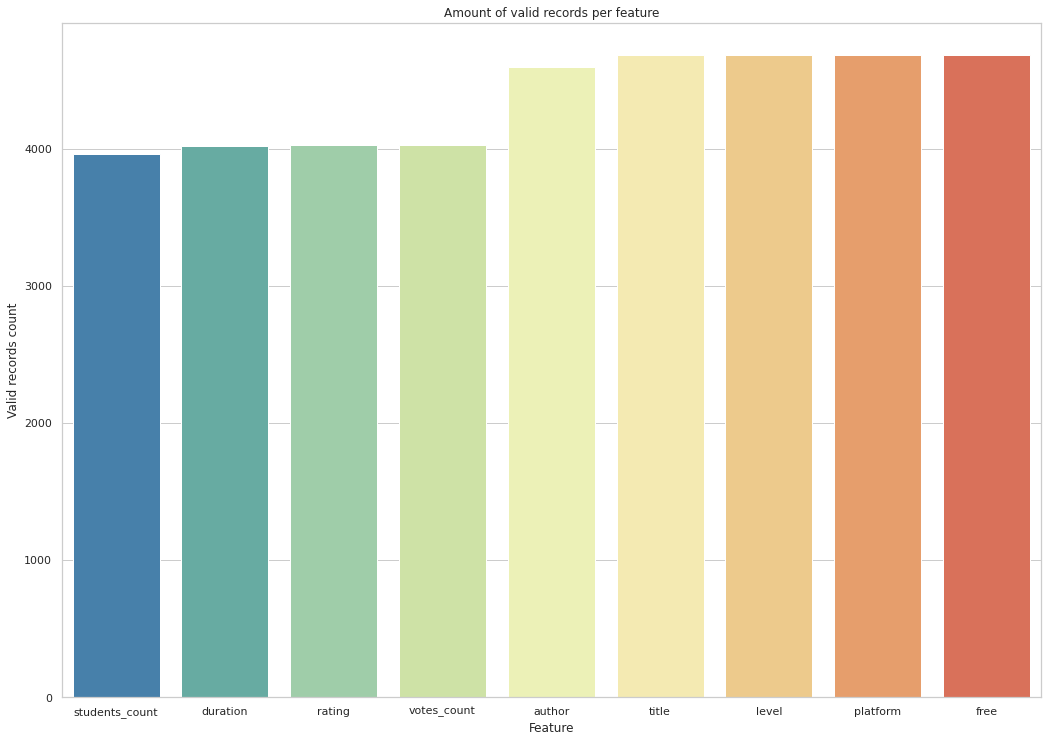

In [2]:
import seaborn as sns
import matplotlib.pyplot as plt


sns.set_theme(style="whitegrid", palette=sns.color_palette("Spectral_r", 10))

valid_columns = dataframe.count().to_frame()
valid_columns.reset_index(inplace=True)
valid_columns = valid_columns.sort_values(0)

fig, ax = plt.subplots(1, 1, figsize=(17.55, 12.405))

sns.barplot(x="index", y=0, data=valid_columns, ax=ax)
ax.set_xlabel("Feature")
ax.set_ylabel("Valid records count")
ax.set_title("Amount of valid records per feature")
plt.show()

# Which platform is more suitable for a specific level?

The Data Science field is not a **"buzzword"** anymore, nevertheless there are still cases when people switch jobs to become Data Scientists. So it's reasonable to assume that majority of the courses is dedicated to the `Beginners`, which is true according to the difficulty level distribution of the data.

Overviewed educational platforms are the most popular among existing on the Internet. Here is shown which platforms provide more content than others.

Third-party commercial organizations publish most of the courses (like IBM, DeepLearning.AI, e.t.c.), so, as expected, the more significant part of the courses is paid.

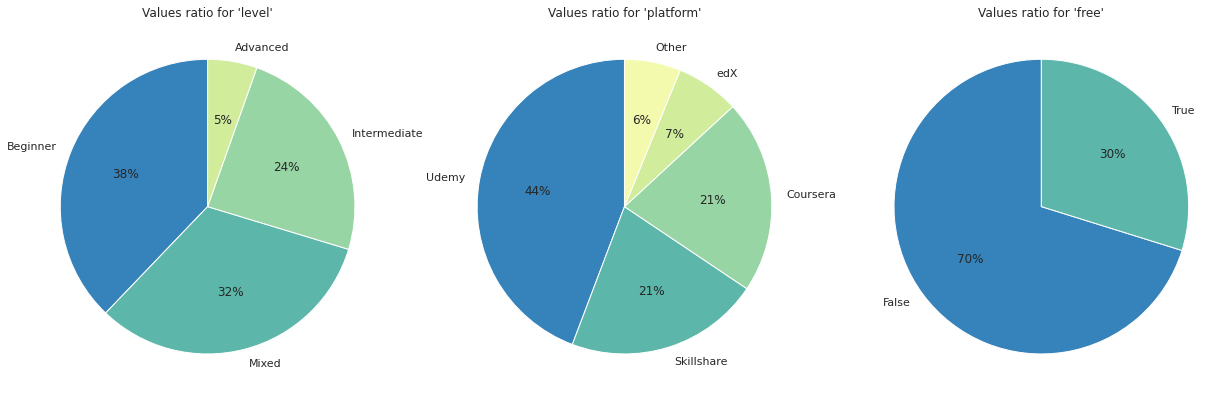

In [3]:
quantitative_features = ["level", "platform", "free"]

fig, ax = plt.subplots(1, 3, figsize=(17.55, 12.405))
fig.tight_layout()

dataframe_quantitative = dataframe.replace(to_replace=["Stepik", "Alison", "FutureLearn", "Pluralsight"],
                                           value='Other')

for i, feature in enumerate(quantitative_features):
    df_feature = dataframe_quantitative[feature].value_counts().to_frame()
    df_feature.reset_index(inplace=True)
    df_feature = df_feature.sort_values(feature, ascending=False)
    
    ax[i].pie(df_feature[feature], labels=df_feature["index"], autopct='%.0f%%', startangle=90)
    ax[i].set_title(f"Values ratio for '{feature}'")

plt.show()

The **Beginner** level is the level of most courses, dedicated for students who only started their Data Science journey or for learners who want to try themselves in another field of activity. **Udemy** platform offers the greatest amount of courses for **Beginner** and **General** levels, which are the most suitable levels for the learners' group mentioned above. For more experienced learners, **Coursera** is a better choice in terms of content variety for **Intermediate** and **Advanced** levels.

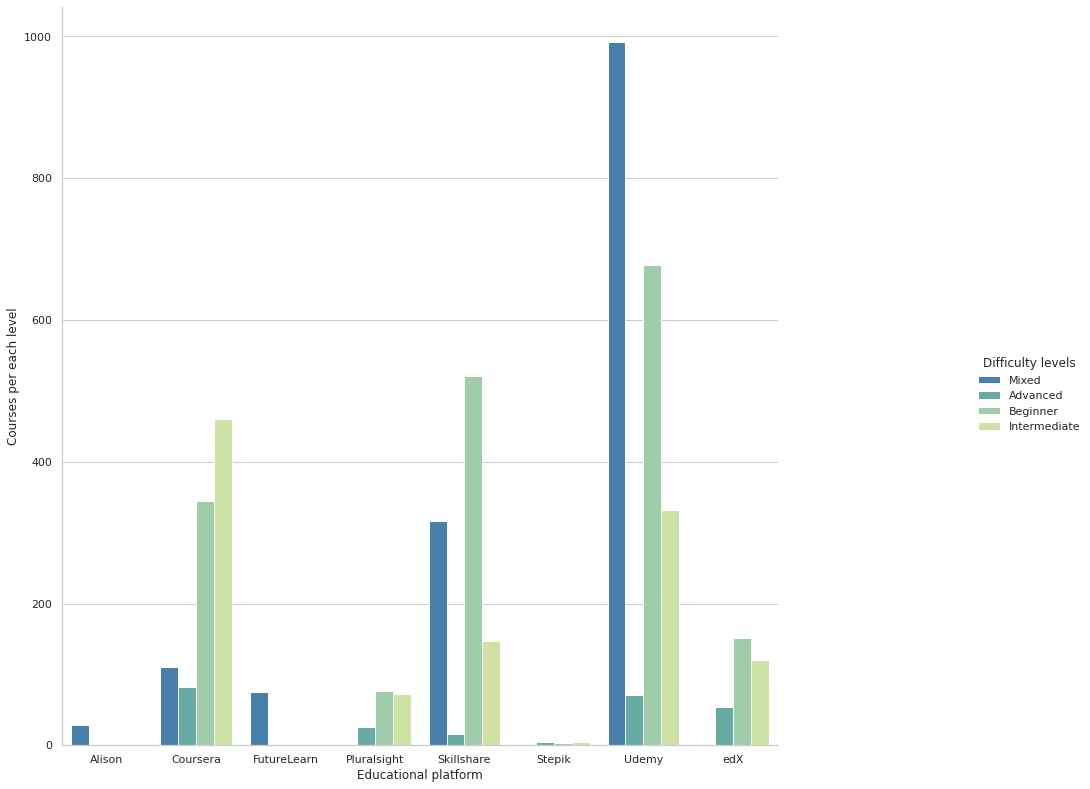

In [4]:
dataframe_difficulty = dataframe.groupby(['platform', 'level'])\
                                .size()\
                                .reset_index(name='counts')

g = sns.catplot(
    data=dataframe_difficulty, kind="bar", x="platform",
    y="counts", hue="level", ci="sd"
)

g.figure.set_size_inches(17.55, 12.405)
g.set_axis_labels("Educational platform", "Courses per each level")
g.legend.set_title("Difficulty levels")

plt.show()

# What depends on the course rating?

The rating metric may give some insights into the quality of the provided learning material in the course, although it doesn't guarantee an exact quality. Platforms with high content variety tend to record it, so it is missing on Alison and edX. The expected rating is the highest on the Coursera platform, from 4 to 5 stars (without including outliers) and the average value. *So for students, who seek **paid quality content**, Coursera is the best choice.*

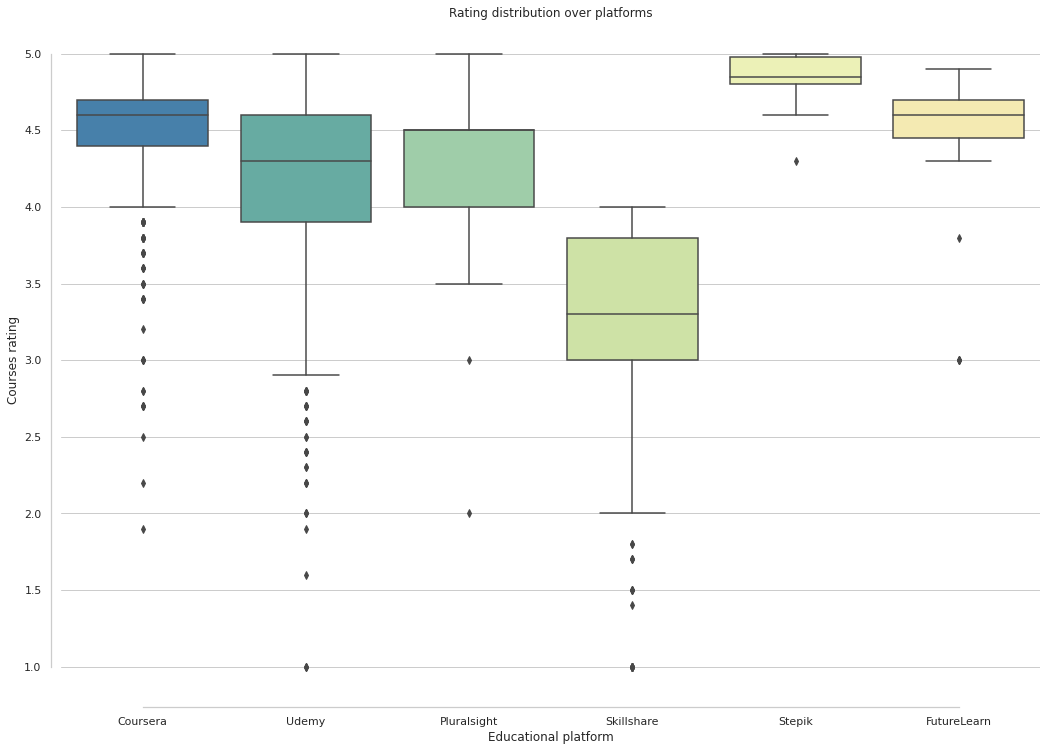

In [5]:
corrected_rating = dataframe[(dataframe.rating > 0.0) & (dataframe.rating is not None)]

fig, ax = plt.subplots(1, 1, figsize=(17.55, 12.405))

sns.boxplot(x="platform", y="rating",
            data=corrected_rating, ax=ax)
sns.despine(offset=10, trim=True)

ax.set_xlabel("Educational platform")
ax.set_ylabel("Courses rating")
ax.set_title("Rating distribution over platforms")

plt.show()

To make the course grab the student's attention, distributors have to develop relevant titles for the preview. Courses may not meet the user's expectations if they cover topics inappropriate for Data Science, like coding interviews or web development. Indeed, courses with a low rating tend to contain off-topic keywords in the title, like "Tetris", "JS", "Web" e.t.c. And courses with the highest rating include more appropriate keywords, like "Python", "Machine learning", "Statistics" e.t.c.

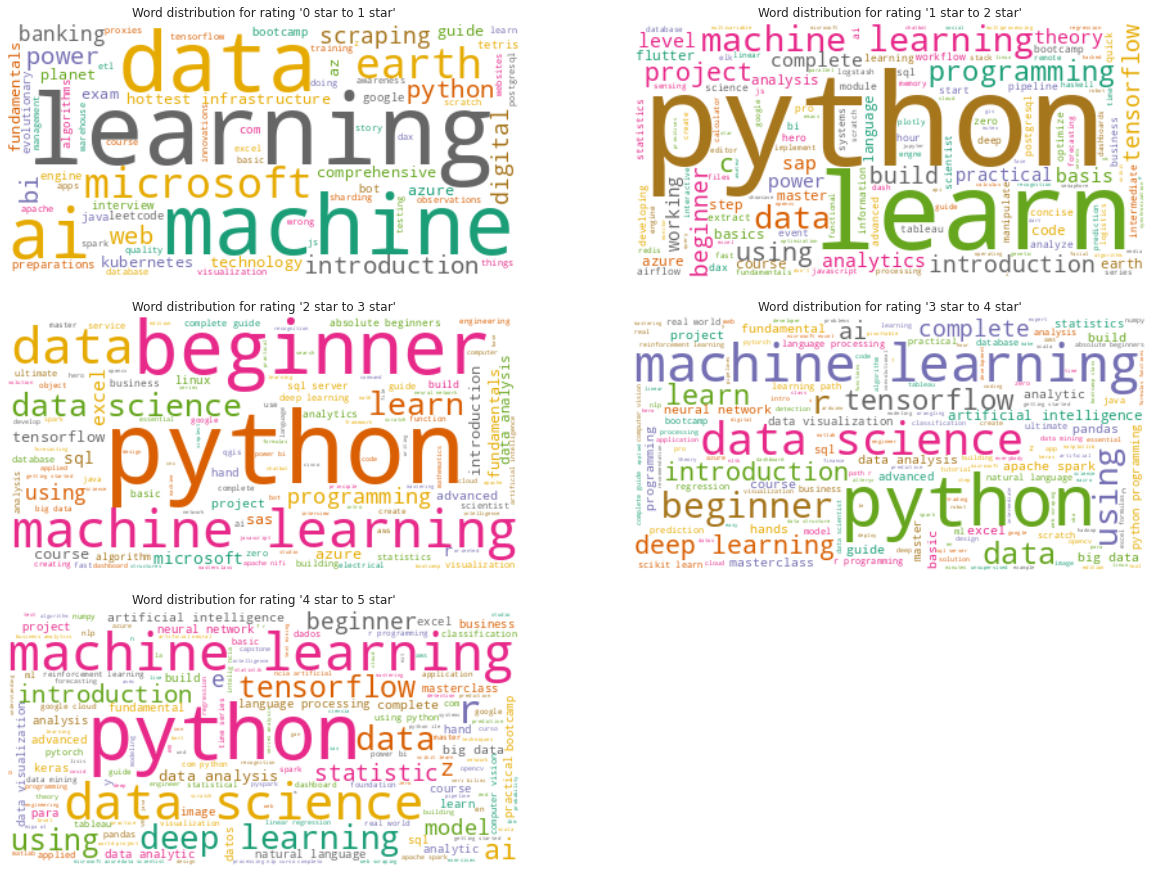

In [6]:
import re

from wordcloud import WordCloud
from sklearn.feature_extraction import text


re_common_line_separator = re.compile(r'[\n\r\t]+')
re_punctuation = re.compile(r'[!"#$%&\(\)\*\+,\./:;<=>?@\\^_`{|}~\[\]-]+')
re_non_unicode = re.compile(r'[^\u0000-\u007F]+')
re_digits_in_words = re.compile(r'\b(\w)*(\d)(\w)*\b')
re_redundant_spaces = re.compile(r'[ ]+')


def text_preprocessing(text: str) -> str:
    steps = [
        # Convert sentences to lowercase
        lambda text: text.lower(),
        # Substitute common line separator symbols [\n, \r, \t] with spaces
        lambda text: re_common_line_separator.sub(' ', text),
        # Remove punctuation
        lambda text: re_punctuation.sub(' ', text),
        # Remove Unicode symbols
        lambda text: re_non_unicode.sub(' ', text),
        # Remove words that contain digits
        lambda text: re_digits_in_words.sub('', text),
        # Remove redundant spaces between each word
        lambda text: re_redundant_spaces.sub(' ', text),
        # Strip string
        lambda text: text.strip()
    ]

    for step in steps:
        text = step(text)

    return text


stop_words = list(text.ENGLISH_STOP_WORDS)
wc = WordCloud(stopwords=stop_words, background_color="white", colormap="Dark2")

dataframe_rating = dataframe[(dataframe.rating > 0.0) & (dataframe.rating is not None)].copy()
rating_sub_masks = { f"{i} star to {i + 1} star": (dataframe_rating.rating > float(i)) & (dataframe_rating.rating <= float(i + 1)) for i in range(5) }
    
for sub, mask in rating_sub_masks.items():
    dataframe_rating.loc[mask, ["rating"]] = sub

dataframe_rating_agg = dataframe_rating[["title", "rating"]].groupby("rating").apply(lambda x: text_preprocessing(" ".join(x['title']))).to_frame(name='agg_titles')

fig_columns, fig_rows = (3, 2)
fig, ax = plt.subplots(fig_columns, fig_rows, figsize=(17.55, 12.405))
fig.delaxes(ax[fig_columns - 1, fig_rows - 1])
fig.tight_layout()

for index, row in enumerate(dataframe_rating_agg.iterrows()):
    category, keywords = row

    wc.generate(keywords['agg_titles'])
    
    ax[index // fig_rows, index % fig_rows].imshow(wc, interpolation="bilinear")
    ax[index // fig_rows, index % fig_rows].axis("off")
    ax[index // fig_rows, index % fig_rows].set_title(f"Word distribution for rating '{category}'")
    
plt.show()

Remember that platforms are only responsible for distributing the courses, while their creation depends entirely on third-party organizations'. Among the technical organizations with the highest rating, there are SAS, DeepLearning.AI, and IBM. Meanwhile, educational institutes with the highest rating are The University of Michigan, University of California, Johns Hopkins University.

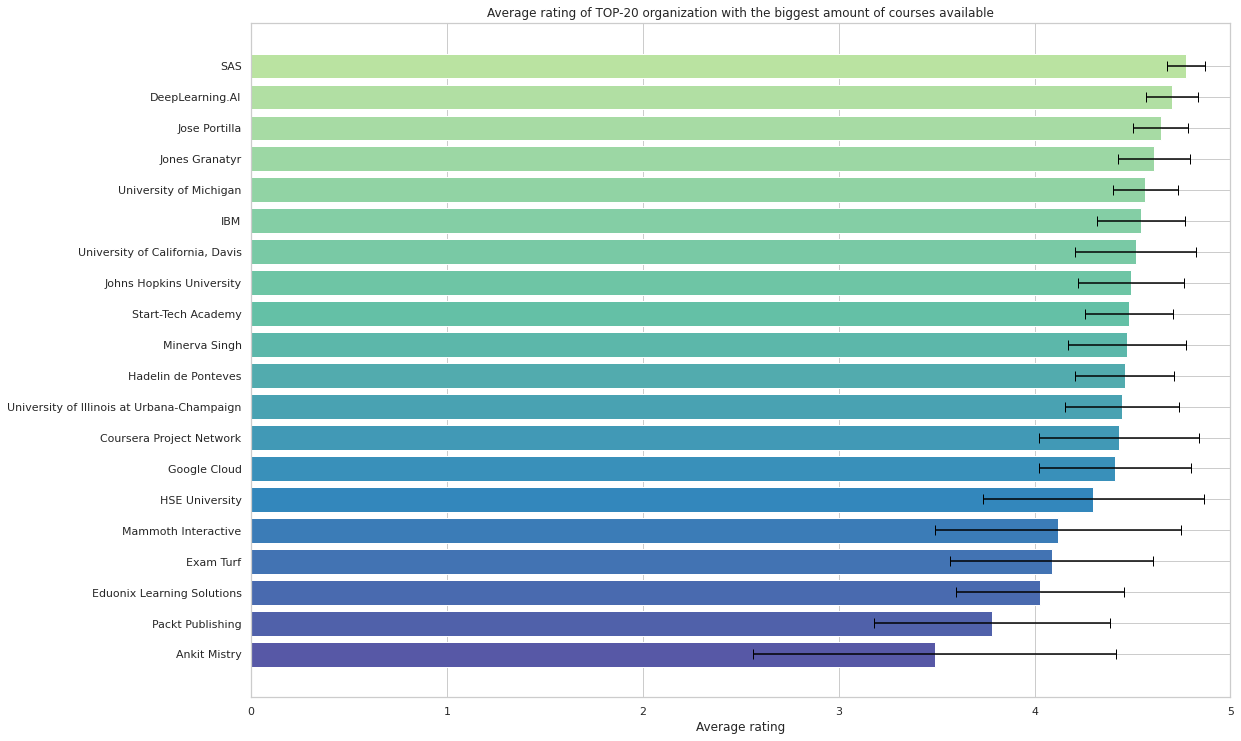

In [7]:
import numpy as np


dataframe_rating = dataframe[(dataframe.rating > 0.0) & (dataframe.rating is not None)].copy()

dataframe_top_distributors = dataframe_rating[["author", "title"]].groupby("author").count().sort_values(
    by=["title"], ascending=[False]
).iloc[:20]

# TOP-20 organization with the biggest amount of courses available
top_distributors = dataframe_top_distributors.index.values

dataframe_top_distributors_rating = dataframe_rating[
    dataframe_rating["author"].isin(top_distributors)
].groupby("author").agg(
    mean=pd.NamedAgg(column="rating", aggfunc="mean"),
    std=pd.NamedAgg(column="rating", aggfunc="std"),
).sort_values(by=["mean"], ascending=[True])

dataframe_top_distributors_rating.reset_index(inplace=True)

fig, ax = plt.subplots(1, 1, figsize=(17.55, 12.405))

ax.barh(dataframe_top_distributors_rating["author"], dataframe_top_distributors_rating["mean"],
        xerr=dataframe_top_distributors_rating["std"], align='center', capsize=5, color=sns.color_palette("Spectral_r", 60))

ax.set_xlabel("Average rating")
ax.set_ylabel("")
ax.set_title("Average rating of TOP-20 organization with the biggest amount of courses available")
ax.set_xlim(left=0.0, right=5.0)

plt.show()

Distributional platform and title relevance may influence the course rating, but they are probably not the only metrics that affect the user experience. These are the following candidates that may also contribute to the course rating with the assumptions:
- **Active enrolled students** - the higher students amount, the more trust in the course from the community;
- **Level** - courses with general level may fall into a specific level category;
- **Duration** - courses with a longer timespan may cover topics not related to the user expectations;
- **Is the course free?** - if the course has a cost, it may be developed by commercial organizations with a professional approach, resulting in higher quality.

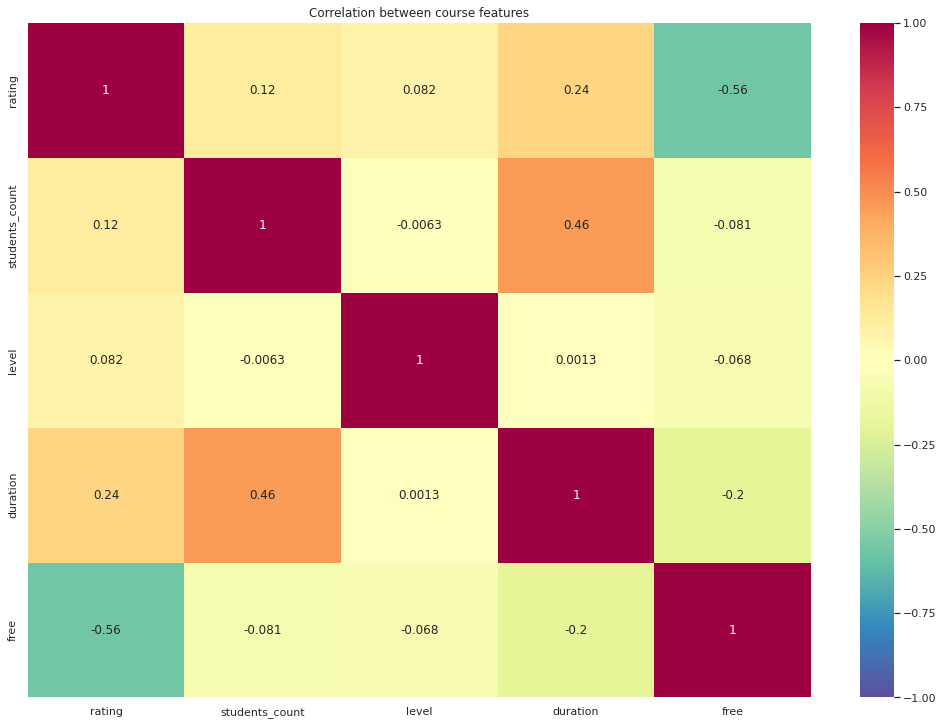

In [8]:
from sklearn.preprocessing import LabelEncoder


encoder = LabelEncoder()

dataframe_rating = dataframe[(dataframe.rating > 0.0) & (dataframe.rating is not None)].copy()
dataframe_corr = dataframe_rating[["rating", "students_count", "level", "duration", "free"]].copy()

dataframe_corr['level'] = encoder.fit_transform(dataframe_corr['level'].values)
dataframe_corr['free'] = encoder.fit_transform(dataframe_corr['free'].values)

fig, ax = plt.subplots(1, 1, figsize=(17.55, 12.405))
sns.heatmap(dataframe_corr.corr(), annot=True, ax=ax, cmap="Spectral_r", vmin=-1.0, vmax=1.0)

ax.set_title("Correlation between course features")
plt.show()

Free/paid and rating are the only metrics with a high enough correlation value to be somehow related. Their moderate negative correlation means that free courses tend to get a lower rating, while paid courses get a higher rating. From the general cases we know, that correlation is not causation. Still, the assumption above explains this moderate relation well. The probability estimation with the "kernel density" below supports this assumption (the most probable paid course rating is around 4.5, while free - approximately 3.0).

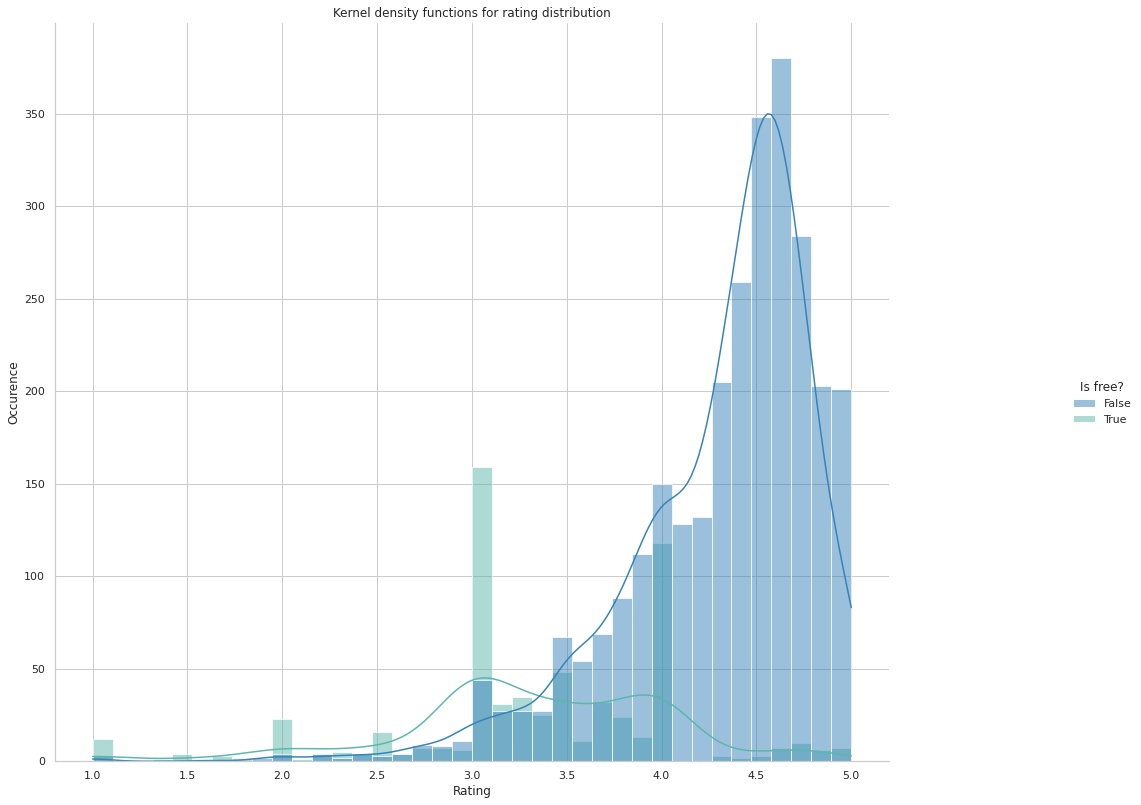

In [9]:
dataframe_rating = dataframe[(dataframe.rating > 0.0) & (dataframe.rating is not None)].copy()

g = sns.displot(data=dataframe_rating, x="rating", hue="free", kde=True)

g.figure.set_size_inches(17.55, 12.405)
g.set_axis_labels("Rating", "Occurence")
g.legend.set_title("Is free?")
g.ax.set_title("Kernel density functions for rating distribution")

plt.show()

# Insights

 1. The majority of the Data Science courses are dedicated to Beginners;
 2. The most common keywords in Data Science courses are: `Python`, `Machine learning`, `Data`, `R`, `Deep Learning`, `Statistics`, `TensorFlow` e.t.c.;
 3. `Udemy` is the most suitable platform for Beginners and General level students, and `Coursera` - for Intermediate and Expert;
 4. Among platforms with the most significant amount of content, `Coursera` has the highest average rating;
 5. Top tech organizations that have the highest average rating are `SAS`, `DeepLearning.AI`, `IBM`, and top educational organizations are `The University of Michigan`, `University of California`, `Johns Hopkins University`;
 6. The rating of the course may indeed depend on whether it is free or not;
 
 
## Techstack

Webcrawlers

![Python](https://img.shields.io/badge/Python-3776AB?style=for-the-badge&logo=python&logoColor=white)
![Selenium](https://img.shields.io/badge/Selenium-43B02A?style=for-the-badge&logo=Selenium&logoColor=white)
![Zyte](https://img.shields.io/badge/Zyte-E10098?style=for-the-badge&logoColor=white)
![Scrapy+Splash](https://img.shields.io/badge/Scrapy+Splash-60a839?&style=for-the-badge&logoColor=white)

Processing pipelines

![Conda](https://img.shields.io/badge/conda-342B029.svg?&style=for-the-badge&logo=anaconda&logoColor=white)
![Jupyter](https://img.shields.io/badge/Jupyter-F37626.svg?&style=for-the-badge&logo=Jupyter&logoColor=white)
![Apache Spark](https://img.shields.io/badge/Apache_Spark-FFFFFF?style=for-the-badge&logo=apachespark&logoColor=#E35A16)

Dashboard

![Streamlit](https://img.shields.io/badge/Streamlit-FF4B4B?style=for-the-badge&logo=Streamlit&logoColor=white)
![Plotly](https://img.shields.io/badge/Plotly-239120?style=for-the-badge&logo=plotly&logoColor=white)
![Pandas](https://img.shields.io/badge/Pandas-2C2D72?style=for-the-badge&logo=pandas&logoColor=white)


## Thank you for interest in this topic

The primary intent of this EDA was to answer popular questions for beginners when choosing a Data Science course. I hope that at least someone who read it found any helpful information! To upvote this notebook or not, it's up to you. Just keep in mind that I'm not an expert; I'm still learning, so if you find any mistake or have a suggestion, leave it in the comments. I'd appreciate any feedback on this work!